In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles, make_classification
%matplotlib inline

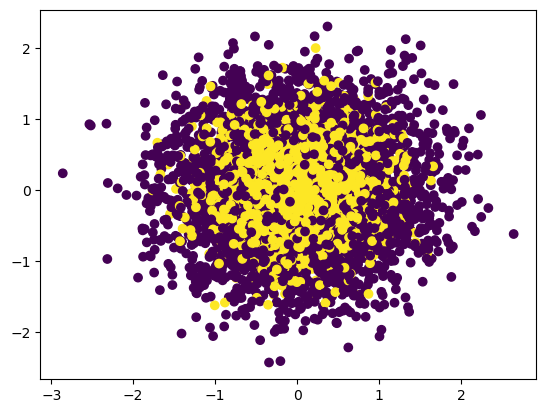

In [56]:
X, y = make_circles(n_samples=5000,noise=0.5, factor=0.2, random_state=1);
plt.scatter(X[:, 0], X[:, 1], c=y)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
# 指将数据转换为均值为 0，标准差为 1 的分布。
# 这种转换有助于消除不同特征尺度差异对模型的影响，
# 尤其在涉及到距离计算的算法（例如 K-means、SVM 等）中效果显著。

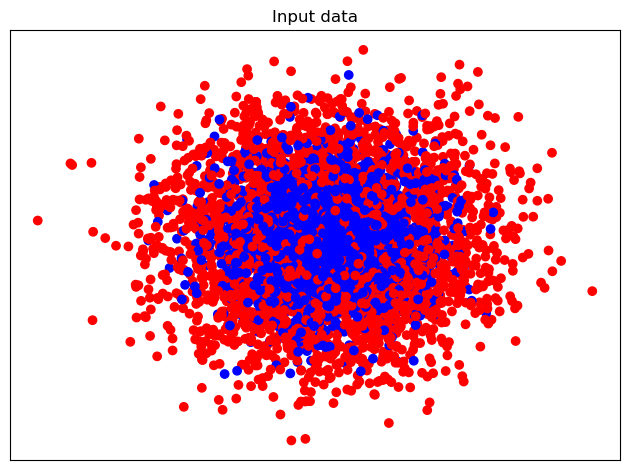

In [58]:
from matplotlib.colors import ListedColormap
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot()

ax.set_title("Input data")
# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid={"C":[0.1, 1, 5, 10, 15, 20], "gamma": [1, 0.1, 0.2, 0.01]}, cv=5)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'gamma': 1} with a score of 0.74


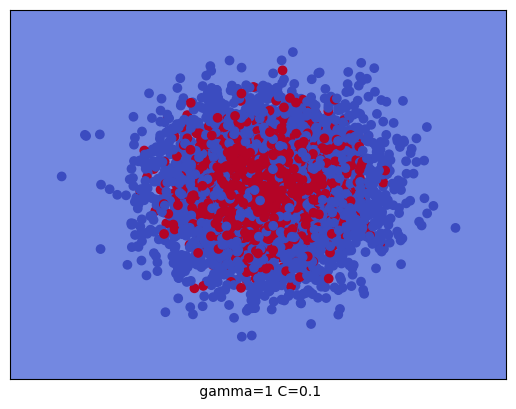

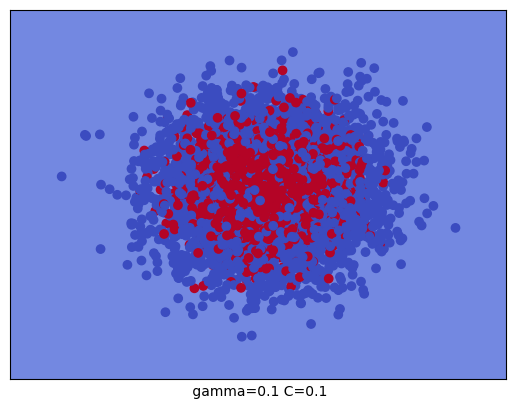

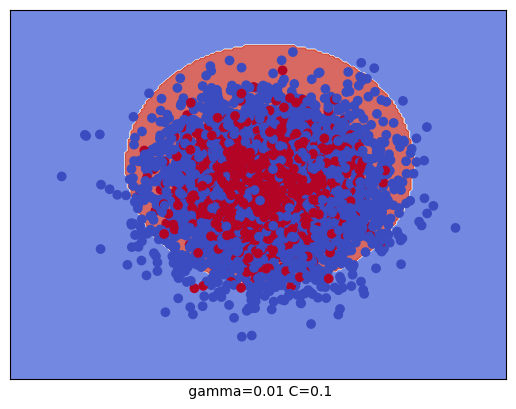

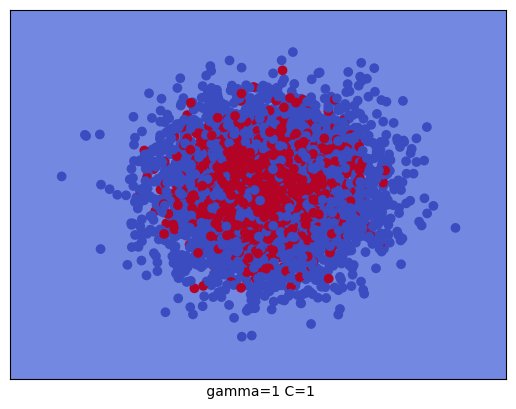

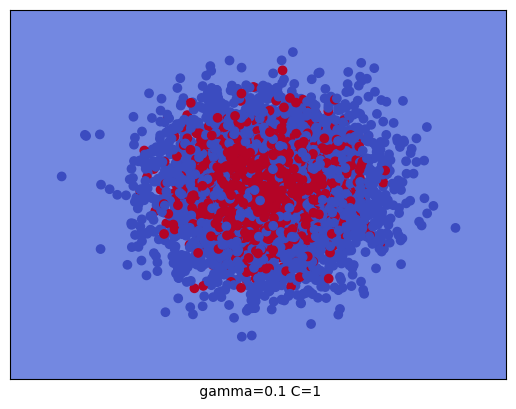

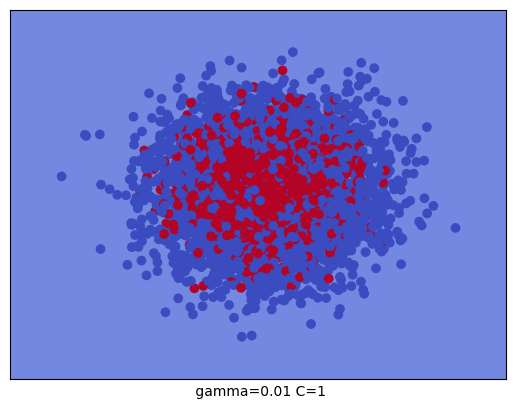

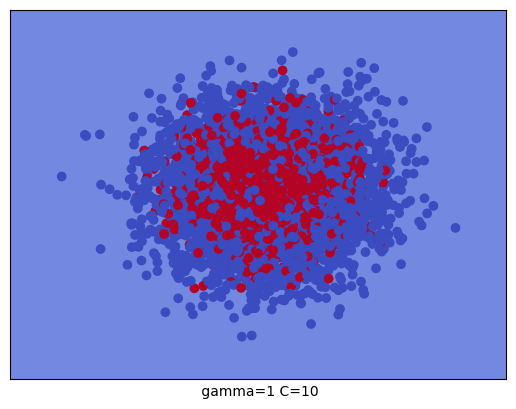

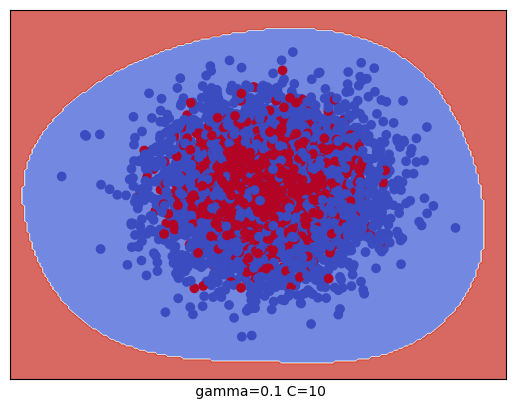

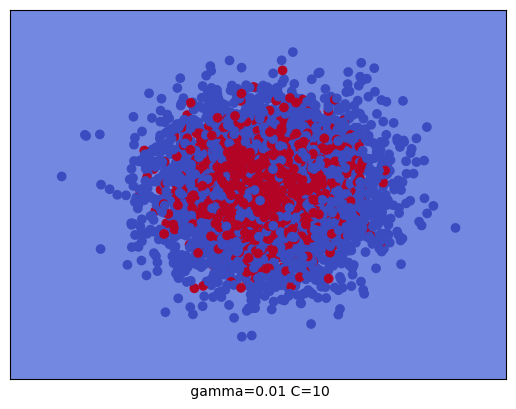

In [67]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,0.05),
                     np.arange(y_min, y_max, 0.05))

for i, C in enumerate((0.1, 1, 10)):
    for j, gamma in enumerate((1, 0.1, 0.01)):
        plt.subplot()       
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X,y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(" gamma=" + str(gamma) + " C=" + str(C))
        plt.show()